In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

In [2]:
# URL of the data download page
url = 'https://www.airquality.nsw.gov.au/air-quality-data-services/data-download-facility'

In [3]:
# Start a session
session = requests.Session()

In [47]:
# Get the initial page to retrieve any necessary tokens or cookies
response = session.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [48]:
# Prepare form data based on the parameters you want
form_data = {
    'Hourly': 'true',
    'Wind direction': 'true',
    'ALBION PARK SOUTH': 'true',
    'Start date': '01/01/2018',
    'End date': ' 01/01/2019',
    'Download data as file':'true',
    # Use the actual name and value
    # Add other parameters as needed
}

In [49]:
# Submit the form
download_response = session.post(url, data=form_data)

In [50]:
new_page_soup = BeautifulSoup(download_response.text, 'html.parser')

<!DOCTYPE html>
<html class="no-js" lang="en">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-K8WRXCH');
  </script>
  <!-- End Google Tag Manager -->
  <title>
   Data download facility | Air Quality NSW
  </title>
  <!-- Misc Metadata -->
  <meta charset="utf-8"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <script>
   var $html = document.documentElement; if ($html.classList) $html.classList.remove("no-js"), $html.classList.add("js"); else { var className = "no-js"; $html.className = $html.classNam
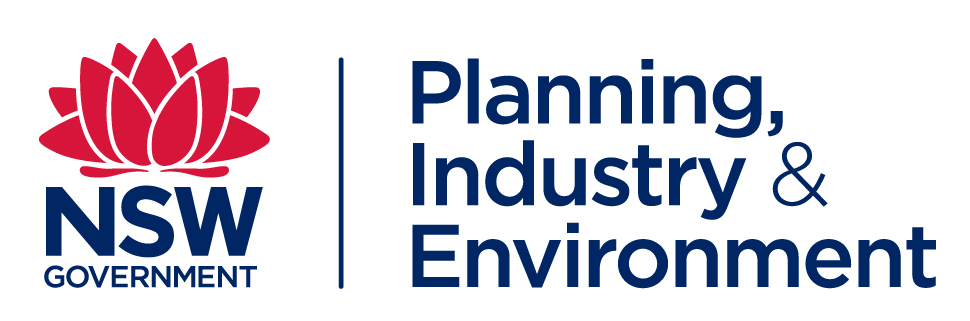
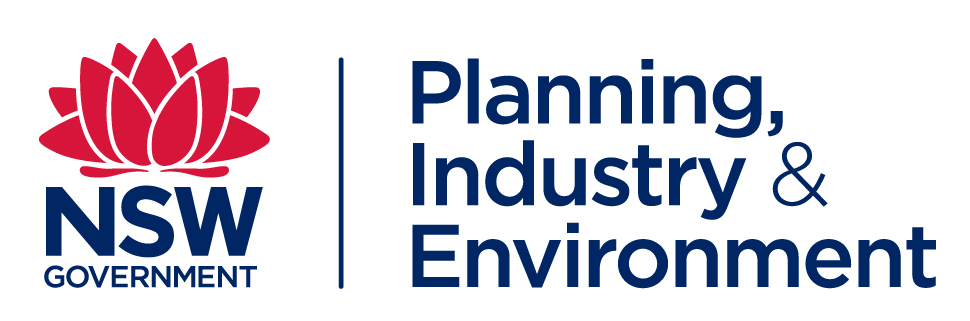

In [56]:
print(new_page_soup.prettify())

In [62]:
downloadlink = new_page_soup.find('a', href=True, text=lambda x: x and x.startswith('https'))

C:\Users\CHENGG\AppData\Local\Temp\ipykernel_13684\2500507954.py:1: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  downloadlink = new_page_soup.find('a', href=True, text=lambda x: x and x.startswith('https'))


In [63]:
downloadlink['href']

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# Check if the response is successful
if download_response.ok:
    # Convert the content to a DataFrame
    data = pd.read_csv(StringIO(download_response.text))
    print(data)  # Display the DataFrame
else:
    print("Failed to download data.")

In [8]:
download_response

<Response [200]>

In [64]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up the Selenium WebDriver
driver = webdriver.Chrome()  # Make sure you have the ChromeDriver installed
driver.get('https://www.airquality.nsw.gov.au/air-quality-data-services/data-download-facility')

# Fill in the form parameters
start_date = driver.find_element(By.NAME, 'startDate')
end_date = driver.find_element(By.NAME, 'endDate')
wind_direction = driver.find_element(By.NAME, 'windDirection')

start_date.send_keys('2023-01-01')
end_date.send_keys('2023-12-31')
wind_direction.click()  # Adjust based on how you select this parameter

# Click the 'Load Data' button
load_data_button = driver.find_element(By.XPATH, '//button[text()="Load data"]')
load_data_button.click()

# Wait for the download link to appear
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[contains(@href, "tmp_table_")]')))

# Find the download link
download_link = driver.find_element(By.XPATH, '//a[contains(@href, "tmp_table_")]')
download_link.click()  # This will start the download

# Close the driver
driver.quit()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[name="startDate"]"}
  (Session info: chrome=130.0.6723.119); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF6114638A5+3004357]
	(No symbol) [0x00007FF6110F9970]
	(No symbol) [0x00007FF610FA582A]
	(No symbol) [0x00007FF610FF5B8E]
	(No symbol) [0x00007FF610FF5E7C]
	(No symbol) [0x00007FF61103EC27]
	(No symbol) [0x00007FF61101BC1F]
	(No symbol) [0x00007FF61103BA4C]
	(No symbol) [0x00007FF61101B983]
	(No symbol) [0x00007FF610FE7628]
	(No symbol) [0x00007FF610FE8791]
	GetHandleVerifier [0x00007FF61148A00D+3161901]
	GetHandleVerifier [0x00007FF6114DE060+3506048]
	GetHandleVerifier [0x00007FF6114D400D+3465005]
	GetHandleVerifier [0x00007FF611250EEB+830987]
	(No symbol) [0x00007FF61110467F]
	(No symbol) [0x00007FF6111009D4]
	(No symbol) [0x00007FF611100B6D]
	(No symbol) [0x00007FF6110F0149]
	BaseThreadInitThunk [0x00007FFB4176257D+29]
	RtlUserThreadStart [0x00007FFB42F0AF08+40]
